In [38]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [39]:
%run -i ./ownlib/PHT-Library.ipynb

In [40]:
# Import images
ori_img = cv2.imread('./assets/maudy.png', 0)
ori_logo = cv2.imread('./assets/squares.png', 0)

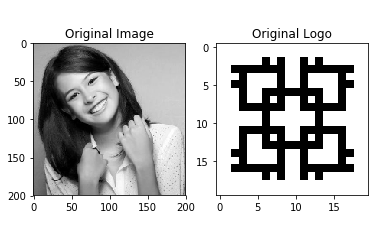

In [41]:
N = 200 # Image Size
G = 20 # Watermark Size

P = 2 * G
T_STEP = int(P / 4) + 1
I_STEP = int(N / 8) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Preprocess Logo
LOGO = cv2.resize(ori_logo, (G,G))
LOGO = (LOGO >= 128) * 1

# Show Image and Logo
imshow2(IMG, LOGO, 'Original Image', 'Original Logo')

Progress: [####################] 100.0%


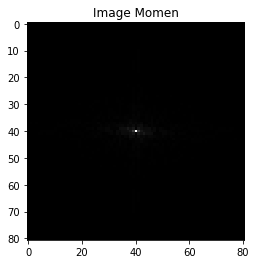

In [42]:
# Calculate Momen of Original Image
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

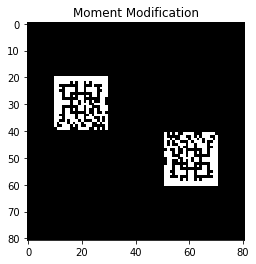

In [43]:
DELTA = 0.5 # Watermarking Power

# Current Binary Value
matQ = np.floor(np.abs(MOMEN) / DELTA) % 2

# Watermark Matrix
P2 = P * 2 + 1
doubleLogo = np.zeros((P2, P2))
doubleLogo[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)] = LOGO
doubleLogo = doubleLogo + np.rot90(np.rot90(doubleLogo))

# Watermark Filter matrix
doubleLogoFilter = np.zeros((P2, P2))
doubleLogoFilter[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)] = 1
doubleLogoFilter = doubleLogoFilter + np.rot90(np.rot90(doubleLogoFilter))
        
# Modified Momen
OMEGA = DELTA * ((doubleLogo != matQ)) / np.abs(MOMEN) * MOMEN
OMEGA = OMEGA * doubleLogoFilter

# Show Modified Momen
imshow(OMEGA, 'Moment Modification')

Progress: [####################] 100.0%


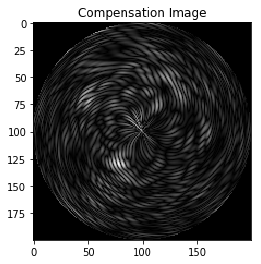

In [44]:
# Calculate Compensation Image
EPSILON = inversePHT(OMEGA, N, P)
imshow(EPSILON, 'Compensation Image')

Progress: [####################] 100.0%


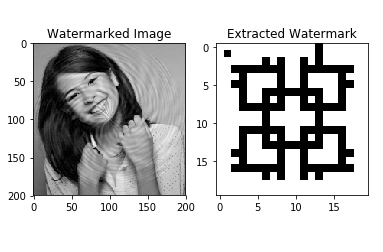

BE  :  3.0
BER :  0.75%


In [45]:
# Add Compensation Image to Original Image
IMG_WATERMARKED = IMG + EPSILON

# Calculate New Momen
MOMEN_WATERMARKED = transformPHT(IMG_WATERMARKED, N, P)

# Calculate Binary Value of New Momen
EXTRACTED_WATERMARK = np.floor(np.abs(MOMEN_WATERMARKED) / DELTA) % 2

# Get Extracted Watermark
EXTRACTED_WATERMARK_CROPPED = EXTRACTED_WATERMARK[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_WATERMARKED, EXTRACTED_WATERMARK_CROPPED, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_EXTRACTED = calcBE(LOGO, EXTRACTED_WATERMARK_CROPPED)
BER_EXTRACTED = BE_EXTRACTED / (G * G)
print('BE  : ', BE_EXTRACTED)
print('BER : ', '{:.2%}'.format(BER_EXTRACTED))

Progress: [####################] 100.0%


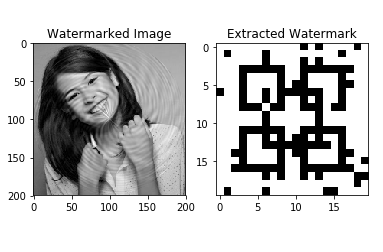

BE  :  25.0
BER :  6.25%


In [53]:
# Attack: Change Complex into Real Number
IMG_REAL = np.abs(IMG_WATERMARKED)

# Calculate Momen
MOMEN_REAL = transformPHT(IMG_REAL, N, P)

# Calculate Binary Value of Momen
EW_REAL = np.floor(np.abs(MOMEN_REAL) / DELTA) % 2

# Get Extracted Watermark
EWC_REAL = EW_REAL[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_REAL, EWC_REAL, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_REAL = calcBE(LOGO, EWC_REAL)
BER_REAL = BE_REAL / (G * G)
print('BE  : ', BE_REAL)
print('BER : ', '{:.2%}'.format(BER_REAL))

Progress: [####################] 100.0%


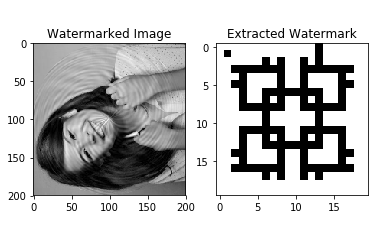

BE  :  3.0
BER :  0.75%


In [47]:
# Attack: Rotation 90 degree
IMG_ROTATE = np.rot90(IMG_WATERMARKED)

# Calculate Momen
MOMEN_ROTATE = transformPHT(IMG_ROTATE, N, P)

# Calculate Binary Value of Momen
EW_ROTATE = np.floor(np.abs(MOMEN_ROTATE) / DELTA) % 2

# Get Extracted Watermark
EWC_ROTATE = EW_ROTATE[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_ROTATE, EWC_ROTATE, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_ROTATE = calcBE(LOGO, EWC_ROTATE)
BER_ROTATE = BE_ROTATE / (G * G)
print('BE  : ', BE_ROTATE)
print('BER : ', '{:.2%}'.format(BER_ROTATE))

Progress: [####################] 100.0%


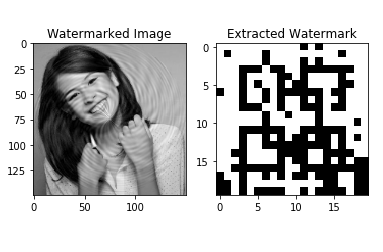

BE  :  62.0
BER :  15.50%


In [48]:
# Attack: Resize 75%
NN = 150
IMG_RESIZE = cv2.resize(np.abs(IMG_WATERMARKED), (150, 150))

# Calculate Momen
MOMEN_RESIZE = transformPHT(IMG_RESIZE, NN, P)

# Calculate Binary Value of Momen
EW_RESIZE = np.floor(np.abs(MOMEN_RESIZE) / DELTA) % 2

# Get Extracted Watermark
EWC_RESIZE = EW_RESIZE[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_RESIZE, EWC_RESIZE, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_RESIZE = calcBE(LOGO, EWC_RESIZE)
BER_RESIZE = BE_RESIZE / (G * G)
print('BE  : ', BE_RESIZE)
print('BER : ', '{:.2%}'.format(BER_RESIZE))

Progress: [####################] 100.0%


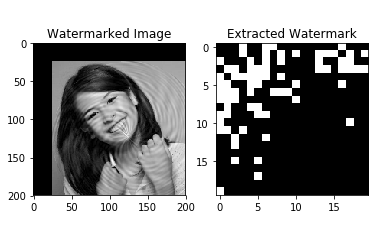

BE  :  254.0
BER :  63.50%


In [49]:
# Attack: Translation 12.5% X 12.5% Y
IMG_TRANSLATION = np.zeros((N,N), dtype='complex128')
IMG_TRANSLATION[25:200, 25:200] = IMG_WATERMARKED[0:175, 0:175]

# Calculate Momen
MOMEN_TRANSLATION = transformPHT(IMG_TRANSLATION, N, P)

# Calculate Binary Value of Momen
EW_TRANSLATION = np.floor(np.abs(MOMEN_TRANSLATION) / DELTA) % 2

# Get Extracted Watermark
EWC_TRANSLATION = EW_TRANSLATION[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_TRANSLATION, EWC_TRANSLATION, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_TRANSLATION = calcBE(LOGO, EWC_TRANSLATION)
BER_TRANSLATION = BE_TRANSLATION / (G * G)
print('BE  : ', BE_TRANSLATION)
print('BER : ', '{:.2%}'.format(BER_TRANSLATION))

Progress: [####################] 100.0%


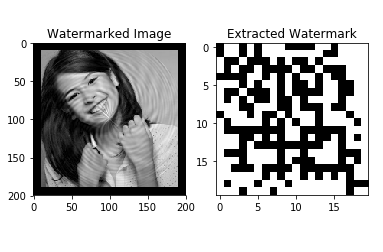

BE  :  86.0
BER :  21.50%


In [50]:
# Attack: FRAME 5%
IMG_CROP = np.copy(IMG_WATERMARKED)
IMG_CROP[0:10,:] = 0
IMG_CROP[:,0:10] = 0
IMG_CROP[190:200,:] = 0
IMG_CROP[:,190:200] = 0

# Calculate Momen
MOMEN_CROP = transformPHT(IMG_CROP, N, P)

# Calculate Binary Value of Momen
EW_CROP = np.floor(np.abs(MOMEN_CROP) / DELTA) % 2

# Get Extracted Watermark
EWC_CROP = EW_CROP[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_CROP, EWC_CROP, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_CROP = calcBE(LOGO, EWC_CROP)
BER_CROP = BE_CROP / (G * G)
print('BE  : ', BE_CROP)
print('BER : ', '{:.2%}'.format(BER_CROP))

Progress: [####################] 100.0%


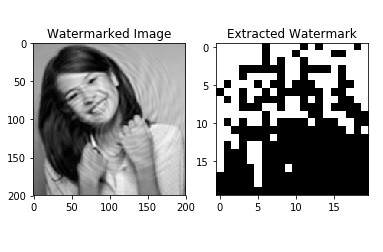

BE  :  148.0
BER :  37.00%


In [51]:
# Attack: BLUR 3x3
IMG_BLUR = cv2.blur(np.abs(IMG_WATERMARKED), (3,3))

# Calculate Momen
MOMEN_BLUR = transformPHT(IMG_BLUR, N, P)

# Calculate Binary Value of Momen
EW_BLUR = np.floor(np.abs(MOMEN_BLUR) / DELTA) % 2

# Get Extracted Watermark
EWC_BLUR = EW_BLUR[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_BLUR, EWC_BLUR, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_BLUR = calcBE(LOGO, EWC_BLUR)
BER_BLUR = BE_BLUR / (G * G)
print('BE  : ', BE_BLUR)
print('BER : ', '{:.2%}'.format(BER_BLUR))

Progress: [####################] 100.0%


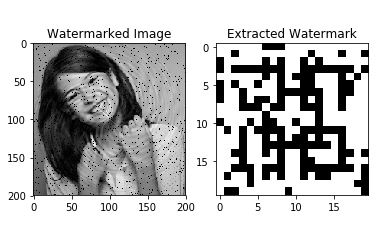

BE  :  52.0
BER :  13.00%


In [52]:
# Attack: RANDOM NOISE 3%
IMG_NOISE = np.copy(IMG_WATERMARKED)
for i, row in enumerate(IMG_NOISE):
    for j, val in enumerate(row):
        if(np.random.randint(low=0, high=100) < 3):
            IMG_NOISE[i,j] = 0

# Calculate Momen
MOMEN_NOISE = transformPHT(IMG_NOISE, N, P)

# Calculate Binary Value of Momen
EW_NOISE = np.floor(np.abs(MOMEN_NOISE) / DELTA) % 2

# Get Extracted Watermark
EWC_NOISE = EW_NOISE[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

# Show Watermarked Image and Extracted Watermark
imshow2(IMG_NOISE, EWC_NOISE, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
BE_NOISE = calcBE(LOGO, EWC_NOISE)
BER_NOISE = BE_NOISE / (G * G)
print('BE  : ', BE_NOISE)
print('BER : ', '{:.2%}'.format(BER_NOISE))